In [6]:
## Imports

# General
import os
import os.path as path
import re
import sys
import json
import cv2
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Torchvision
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms as tf
from torchvision.io import read_image

# Load local SimSiam model
sys.path.append('/'+path.join(os.getcwd(), '0_pytorch-SimSiam'))
from models.simsiam import SimSiam
from collections import OrderedDict

%matplotlib inline

In [14]:
# Set data to be processed
DROOT = './0_data'

# Folders
EYE_SRC = path.join(DROOT, "2_procfootage/eyetracker")
RND_SRC = path.join(DROOT, "2_procfootage/360-cropped.jpg")
MAP_DST = path.join(DROOT, "4_simsiam/mapping.csv")

# Files
EYE_SRC_LIST = glob(path.join(EYE_SRC, '*.png'))

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread(EYE_SRC_LIST[0])# ,cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(RND_SRC)# ,        cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [31]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-yaf6rry6/opencv/modules/core/src/batch_distance.cpp:282: error: (-215:Assertion failed) (type == CV_8U && dtype == CV_32S) || dtype == CV_32F in function 'batchDistance'


# Sift

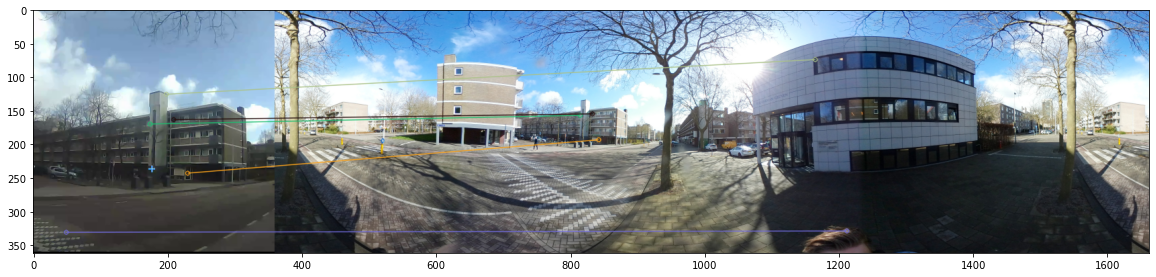

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread(EYE_SRC_LIST[120])# ,cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(RND_SRC)# ,        cv.IMREAD_GRAYSCALE) # trainImage


scale_percent = 50 # percent of original size
width = int(img1.shape[1] * scale_percent / 100)
height = int(img1.shape[0] * scale_percent / 100)
img1 = cv2.resize(img1, (width, height), interpolation = cv2.INTER_AREA)


scale_percent = 20 # percent of original size
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
img2 = cv2.resize(img2, (width, height), interpolation = cv2.INTER_AREA)

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))